In [1]:
import math
import random

import numpy as np

%matplotlib notebook
import matplotlib 
import matplotlib.pyplot as plt

import environment_2d

In [2]:
np.random.seed(4)

In [3]:
env = environment_2d.EnvironmentFast(10, 6, 5)
#env = environment_2d.Environment(10, 6, 5)

In [4]:
class PRM:
    def __init__(self, env, radius):
        self.env = env
        
        self.bounds = np.array([self.env.size_x, self.env.size_y], dtype=float)
        self.r = radius
        self.r2 = radius * radius
    
        self.reset()
    
    def reset(self):
        self.nodes = []
        self.adj_list = []
        
    def add_node(self) -> bool:
        """
        
        Returns
        ----------
        bool: if node was added
        """
        
        # Sample random point in configuration space
        MAX_ATTEMPTS = 100
        point_found = False
        for i in range(MAX_ATTEMPTS):
            rand_point = np.multiply(np.random.rand(2), self.bounds)
            if not self.env.check_collision_np(rand_point):
                point_found = True
                break
        
        if not point_found:
            return False 
        
        # Starting Condition
        if len(self.nodes) == 0:
            self.nodes.append(rand_point)
            self.adj_list.append([])
            return True
        
        # Find neighbouring points within radius to connect to
        nodes_np = np.array(self.nodes)
        d = nodes_np - rand_point
        dist2 = np.sum(np.power(d,2), 1)
        in_rad_mask = dist2 < self.r2
        
        inds = np.where(in_rad_mask)[0]
        
        new_n = len(self.nodes)
        connect = []
        
        # Check traversibility to the neighbour node then connect graph
        for i in range(len(inds)):
            ind = inds[i]
            if self.env.check_segment_outside_np(rand_point.reshape(2,), nodes_np[ind].reshape(2,)):
                connect.append(ind)
                self.adj_list[ind].append(new_n)
        self.nodes.append(rand_point)
        self.adj_list.append(connect)
        
        return True
    
    def plot(self, c='b'):
        nodes_np = np.array(self.nodes)
        
        plt.scatter(nodes_np[:,0], nodes_np[:,1], c=c)
        
        # No duplicate filter because only for debug visualization
        for src_ind, li in enumerate(self.adj_list):
            src_node = self.nodes[src_ind]
            for dst_ind in li:
                dst_node = self.nodes[dst_ind]
                plt.plot([src_node[0], dst_node[0]], [src_node[1], dst_node[1]], c)
                
        plt.show()

<IPython.core.display.Javascript object>


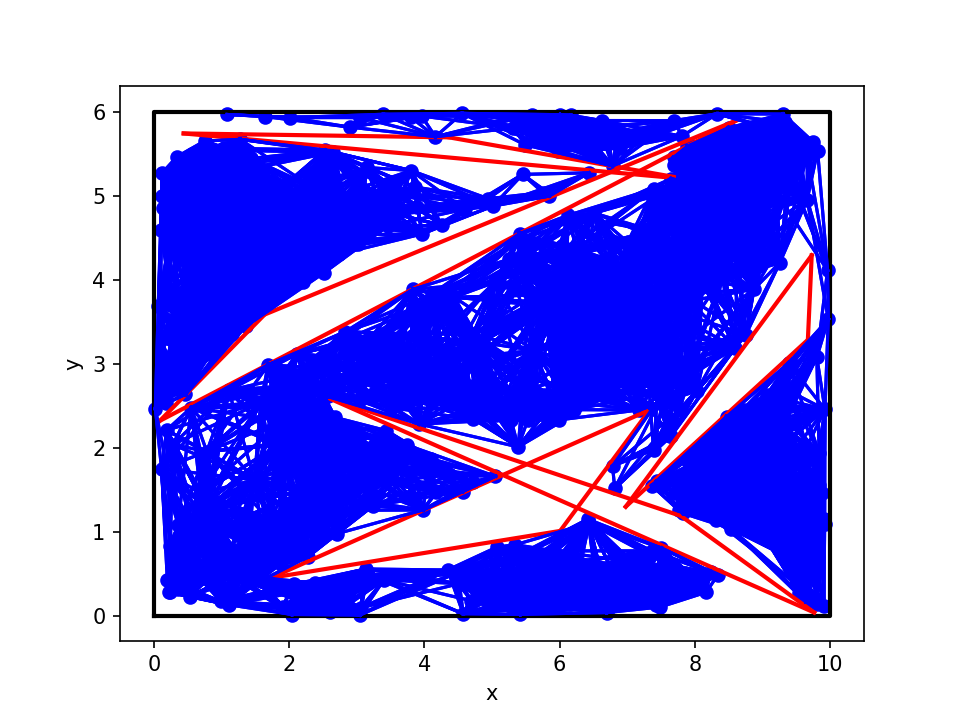

In [9]:
fig1 = env.plot()

In [10]:
prm = PRM(env, 1.5)

In [11]:
for i in range(500):
    prm.add_node()

In [12]:
prm.plot()

In [13]:
prm.nodes

[array([5.27908823, 5.6254295 ]),
 array([5.21696122, 0.6491603 ]),
 array([5.2440408 , 3.82566146]),
 array([4.01495444, 3.89883065]),
 array([3.96900003, 3.74349668])]

In [14]:
prm.adj_list

[[], [], [], [4], [0]]

In [12]:
np.array(prm.nodes)

array([[5.27908823, 5.6254295 ],
       [5.21696122, 0.6491603 ],
       [5.2440408 , 3.82566146],
       [4.01495444, 3.89883065],
       [3.96900003, 3.74349668]])

In [24]:
env.check_collision_np(np.array([4,2]))

False

In [5]:
env.check_collision(4,2)

False

In [45]:
np.where(rx > 0)

(array([0, 0, 1, 2, 2, 3, 3, 4, 4], dtype=int64),
 array([0, 2, 0, 0, 1, 0, 2, 0, 1], dtype=int64))

In [36]:
a = np.array([7.75,5.3])
b = np.array([6,2.5])

In [37]:
env.plot_query(a[0], a[1], b[0], b[1])

In [38]:
env.check_segment_outside_np(a,b)

False

In [39]:
rx = np.matmul(env.As, a) - env.Cs

In [40]:
ry = np.matmul(env.As, b) - env.Cs

In [41]:
rx

array([[  2.04489421,  -8.69551224,   9.24609915],
       [ 32.88859699, -21.59318447,  -8.04955231],
       [  2.15945532,   5.07122839,  -1.97647658],
       [  1.38783803,  -0.30199551,   0.69765064],
       [ 17.379729  ,   3.17878416, -15.12960409]])

In [42]:
ry

array([[  3.64619694,  -6.23338547,   5.18266966],
       [  8.136525  ,  -4.364351  ,  -0.52631379],
       [ 17.68198245,   7.19419247, -19.6219678 ],
       [ 12.44405696,  10.37069007, -21.03125387],
       [  6.38431237,   1.98988827,  -2.94529157]])

In [43]:
left_x = rx < 0
left_y = ry < 0

In [44]:
np.logical_and(left_x, left_y)

array([[False,  True, False],
       [False,  True,  True],
       [False, False,  True],
       [False, False, False],
       [False, False,  True]])

In [16]:
cond_1 = np.all(np.any(np.logical_and(left_x, left_y), 1))

In [17]:
cond_1

False

In [21]:
v = b - a

In [22]:
v

array([-2.5,  2. ])

In [23]:
u = env.verts - a

In [26]:
u

array([[[ 1.17029839,  2.7833935 ],
        [ 1.2268436 ,  3.78889596],
        [-1.52271175,  0.79653697]],

       [[ 1.26274455, -0.46261847],
        [-5.97017638,  2.10874919],
        [-0.70617078,  0.68611045]],

       [[ 0.12993236,  5.40040406],
        [-6.86157759,  3.08400366],
        [-8.41013902,  1.8194277 ]],

       [[-8.05839942,  5.23991781],
        [-4.13853353,  5.19386384],
        [-0.63694014,  4.69773579]],

       [[-6.76834579, -0.05030848],
        [-2.49257279,  0.5078331 ],
        [-1.16619832,  1.95066316]]])

In [30]:
c = np.cross(v, u)

In [31]:
c

array([[ -9.29908052, -11.9259271 ,   1.05408107],
       [ -1.36894292,   6.66847977,  -0.30293455],
       [-13.76087487,   6.01314601,  12.27170881],
       [  3.01700433,  -4.70759254, -10.4704592 ],
       [ 13.66246276,   3.71556282,  -2.54426125]])

In [34]:
cond_2 = np.logical_or(np.all(c < 0, 1), np.all(c > 0, 1))

In [35]:
cond_2

array([False, False, False, False, False])

In [18]:
env.obs[0].segmentOutside(a,b)

AttributeError: 'TriangularObstacle' object has no attribute 'segmentOutside'

In [19]:
env.obs[0].contains_np(a)

False

In [24]:
env.obs[0].contains_np(b)

False

In [12]:
env.As

array([[[-1.00550247,  0.05654521],
        [ 2.99235899, -2.74955535],
        [-1.98685652,  2.69301014]]])

In [13]:
env.Cs

array([[-25.9206731 ,  16.03868302,  -8.36829119],
       [ -5.08577056,   0.44449037,   4.44699887],
       [ 19.10568612, -14.98781876,  -4.30677181],
       [-21.50019521,  -3.59396373,  17.53355625],
       [ -2.84422323,  -1.45600461,   3.36028725]])

In [14]:
n = np.array([6,2])

In [15]:
v = np.dot(env.As, n) - env.Cs

In [16]:
v

array([[-3.81268811e+00,  6.96310496e+00,  1.50998644e+01],
       [ 2.18858269e+00,  3.95604650e-01, -2.38990603e+00],
       [ 3.79027222e-01, -1.92730247e-01,  2.60748079e-03],
       [ 5.25020794e+00,  2.58218688e+00, -2.71792136e-01],
       [ 2.27844172e+00,  2.33753468e-01, -1.57225459e+00]])

In [17]:
np.any(np.all(v > 0, 1))

False

In [6]:
for obs in env.obs:
    print(f"obs: {obs.x0},{obs.y0} {obs.x1},{obs.y1} {obs.x2},{obs.y2}")
    print(obs.contains(6,2))

obs: 8.629932355992223,5.900404063051877 1.6384224140469872,3.584003663597155 0.08986097667554982,2.3194276958617763
False
